This dataset is from kaggle and is about diabetes which I am using to demonstrate the implementation on 
explainable AI. The dataset contains 768 rows and 9 columns. The columns are:
1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1) where 1 means the person has diabetes and 0 means the person does not have diabetes.

In [37]:
#Import neccesary libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import shap
from lime.lime_tabular import LimeTabularExplainer
import eli5


Importing the data and splitting in into training and testing x and y

In [40]:
#Manually loading the data and splitting into features and target variable for both training and testing datasets
training_data = pd.read_csv('diabetes_training.csv', index_col=0)
testing_data = pd.read_csv('diabetes_testing.csv')

x_train = training_data.drop('Outcome', axis=1)
y_train = training_data['Outcome']

x_test = testing_data.drop('Outcome', axis=1)
y_test = testing_data['Outcome']

x_test = x_test[x_train.columns]


#training_data.head()
#training_data.info()
#training_data.describe()
#training_data.isnull().sum()



I will now produce and EDA countplot to visuaulise the comparison between the training data and testing.

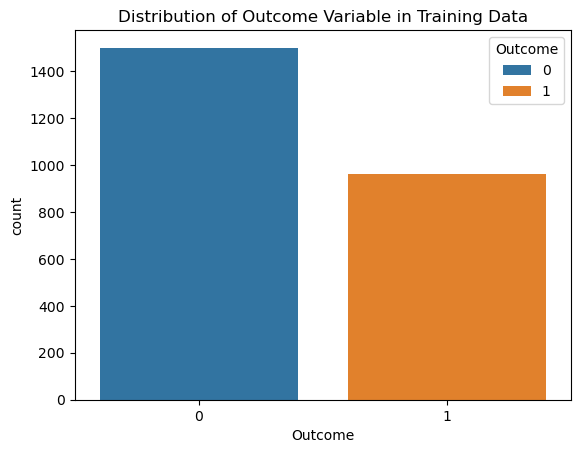

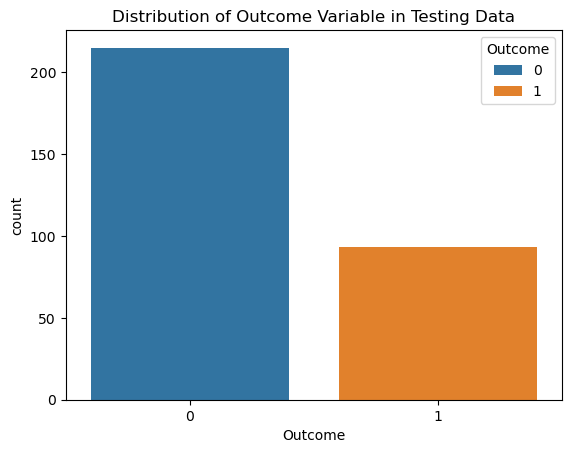

In [41]:
#sns to compare the distribution of the target variable in both training and testing datasets
sns.countplot(x='Outcome', data=training_data, hue='Outcome')
plt.title('Distribution of Outcome Variable in Training Data')
plt.show()
plt.close()

sns.countplot(x='Outcome',data=testing_data, hue='Outcome')
plt.title('Distribution of Outcome Variable in Testing Data')
plt.show()
plt.close()

I will now use the RanadomTreeClassifier to help reduce bias and reduce variance of a normal decison tree 

In [42]:
#Calling the Random Forest Classifier and fitting it to the training data
rfc = RandomForestClassifier(max_features=2, n_estimators=100, bootstrap=True)
rfc.fit(x_train, y_train)



RandomForestClassifier(max_features=2)

Now that model has been trained I will create a variable for a predicted output of Y using the test set of X and compare the actual vs precicted outputs

In [43]:
# predicting the test set results and evaluating the model
y_pred = rfc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       215
           1       0.67      0.60      0.63        93

    accuracy                           0.79       308
   macro avg       0.75      0.74      0.74       308
weighted avg       0.78      0.79      0.79       308



Fitting the Lime explainer

In [50]:
class_names = ['No Diabetes', 'Diabetes']
features_names = list(x_train.columns)
explainer = LimeTabularExplainer(x_train.values, feature_names=features_names, class_names=class_names, mode='classification')



Plotting Lime

In [55]:
explanantion = explanation.explain_instance(x_test.iloc[5], rfc.predict_proba)
explanantion.show_in_notebook(show_table=True, show_all=False)

NameError: name 'explanation' is not defined